In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/machaax/Desktop/ROPES/ropes/data/transmission_line_table.csv", index_col=0)

In [3]:
df.head()

,OBJECTID,ID,SUB_1,SUB_2,VOLTAGE,TYPE,STATUS,SHAPE_Length,geometry
0,1,100511,WATERS RIVER,TAP136228,115.0,AC; OVERHEAD,IN SERVICE,0.000535,"MULTILINESTRING ((-70.9285537 42.54359, -70.92..."
1,2,140809,PHILLIPS BEND,JOHN SEVIER,161.0,AC; OVERHEAD,IN SERVICE,0.198755,"MULTILINESTRING ((-82.961231 36.3769931, -82.9..."
2,3,140837,TAP140359,TAP140373,115.0,AC; OVERHEAD,IN SERVICE,0.042609,"MULTILINESTRING ((-75.3340663 43.0894616, -75...."
3,4,140811,GENTILLY ROAD,MICHOUD STATION,115.0,AC; OVERHEAD,IN SERVICE,0.120183,"MULTILINESTRING ((-89.9372786 30.0090511, -89...."
4,5,140813,UNKNOWN137689,TAP137690,161.0,AC; OVERHEAD,IN SERVICE,0.069155,"MULTILINESTRING ((-90.5660876 41.6125604, -90...."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94216 entries, 0 to 94215
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      94216 non-null  int64  
 1   ID            94216 non-null  int64  
 2   SUB_1         94216 non-null  object 
 3   SUB_2         94216 non-null  object 
 4   VOLTAGE       94216 non-null  float64
 5   TYPE          94216 non-null  object 
 6   STATUS        94216 non-null  object 
 7   SHAPE_Length  94216 non-null  float64
 8   geometry      94216 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 7.2+ MB


In [5]:
len(df), df['OBJECTID'].nunique(), df['ID'].nunique(), df['SUB_1'].nunique(), df['SUB_2'].nunique(), df['VOLTAGE'].nunique(), df['TYPE'].nunique(), df['STATUS'].nunique()

(94216, 94216, 94216, 49363, 47495, 66, 9, 5)

In [6]:
df['TYPE'].unique(), df['STATUS'].unique()

(array(['AC; OVERHEAD', 'OVERHEAD', 'AC; UNDERGROUND', 'UNDERGROUND',
        'NOT AVAILABLE', 'DC; OVERHEAD', 'AC', 'DC', 'DC; UNDERGROUND'],
       dtype=object),
 array(['IN SERVICE', 'NOT AVAILABLE', 'UNDER CONSTRUCTION', 'INACTIVE',
        'PROPOSED'], dtype=object))

In [7]:
df['VOLTAGE'].describe()

count     94216.000000
mean    -149144.568313
std      356384.268153
min     -999999.000000
25%          69.000000
50%         115.000000
75%         138.000000
max        1000.000000
Name: VOLTAGE, dtype: float64

In [8]:
# print rows where VOLTAGE is greater than 500
df[df['VOLTAGE'] > 800]

,OBJECTID,ID,SUB_1,SUB_2,VOLTAGE,TYPE,STATUS,SHAPE_Length,geometry
69088,69089,200823,CELILO,SYLMAR EAST,1000.0,DC,IN SERVICE,12.781856,"MULTILINESTRING ((-121.1130786 45.5946075, -12..."


In [9]:
df[df['VOLTAGE'] < 0].shape

(14062, 9)

In [10]:
df[df['VOLTAGE'] < 0]['VOLTAGE'].nunique(), df[df['VOLTAGE'] < 0]['VOLTAGE'].unique()

(1, array([-999999.]))

In [11]:
# find None or NaN values in VOLTAGE column
df['VOLTAGE'].isnull().sum()

0

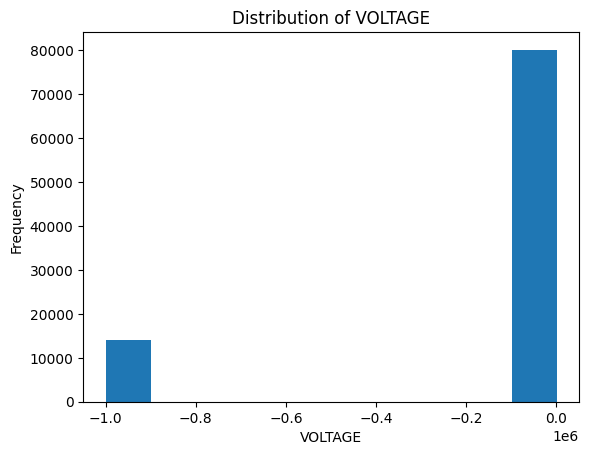

In [12]:
# graph VOLTAGE distribution
import matplotlib.pyplot as plt
plt.hist(df['VOLTAGE'].dropna(), bins=10)
plt.xlabel('VOLTAGE')
plt.ylabel('Frequency')
plt.title('Distribution of VOLTAGE')
plt.show()

In [13]:
type(df['geometry'].iloc[0]), df['geometry'].iloc[0]

(str, 'MULTILINESTRING ((-70.9285537 42.54359, -70.9284093 42.5441055))')

In [14]:
df['geometry'].iloc[1]

'MULTILINESTRING ((-82.961231 36.3769931, -82.9608982 36.3767008, -82.9596644 36.3770983, -82.9566694 36.3779403, -82.9544144 36.3785479, -82.9509828 36.3783781, -82.9486834 36.3775958, -82.94449 36.3760295, -82.9405431 36.3742371, -82.9369298 36.371329, -82.9340288 36.368967, -82.9318689 36.3670092, -82.930141 36.367897, -82.9287103 36.3685667, -82.9256314 36.370783, -82.9142244 36.3788017, -82.9119223 36.3808468, -82.9045019 36.3875391, -82.9032384 36.3894664, -82.9014396 36.3990604, -82.8955183 36.4038253, -82.8939228 36.4051209, -82.890475 36.4074338, -82.8869629 36.409843, -82.8729574 36.4192549, -82.8560823 36.4306264, -82.8480195 36.4360979, -82.8417662 36.4403917, -82.8298594 36.4486044, -82.8245485 36.45096, -82.8197729 36.4522557, -82.8177599 36.4534977, -82.8136375 36.4557356, -82.8097637 36.4573366, -82.8049001 36.4595047, -82.8059091 36.4610427, -82.806542 36.4619583, -82.8078841 36.4607057))'

In [15]:
# count of appearances of the word 'MULTILINESTRING' in each row
df['geometry'].str.count('MULTILINESTRING').value_counts()

geometry
1    94216
Name: count, dtype: int64

## saving random sample into /data/ folder

In [16]:
pwd

'/Users/machaax/Desktop/ROPES/ropes/notebooks'

In [17]:
sample_df = df.sample(1000, random_state=42)
sample_df.to_csv("../data/sample.csv")

In [18]:
sample_df.head()

,OBJECTID,ID,SUB_1,SUB_2,VOLTAGE,TYPE,STATUS,SHAPE_Length,geometry
34893,34894,122566,UNKNOWN141217,TAP152450,138.0,AC; OVERHEAD,IN SERVICE,0.000596,"MULTILINESTRING ((-83.293687 40.218521, -83.29..."
77182,77183,209175,TAP207788,UNKNOWN207789,69.0,AC; OVERHEAD,NOT AVAILABLE,0.004719,"MULTILINESTRING ((-114.1128018 47.6138357, -11..."
52040,52041,175372,TAP154202,UNKNOWN170283,100.0,AC; OVERHEAD,IN SERVICE,0.024534,"MULTILINESTRING ((-80.9026089 35.0860877, -80...."
3200,3201,144869,TROY,TAP154683,161.0,AC; OVERHEAD,IN SERVICE,0.105336,"MULTILINESTRING ((-89.1571653 36.3341038, -89...."
29885,29886,163816,BRISTOW,TAP160436,161.0,AC; OVERHEAD,IN SERVICE,0.006948,"MULTILINESTRING ((-86.3338278 37.0340042, -86...."


In [19]:
sample_df.columns

Index(['OBJECTID', 'ID', 'SUB_1', 'SUB_2', 'VOLTAGE', 'TYPE', 'STATUS',
       'SHAPE_Length', 'geometry'],
      dtype='object')

In [20]:
sample_2_df = df.sample(10000, random_state=42)
sample_2_df.to_csv("../data/sample_10k_rows.csv")

In [21]:
df2 = pd.read_csv("/Users/machaax/Desktop/ROPES/ropes/data/substations.csv", index_col=0)

In [22]:
df2.head()

,Substation ID,Substation Name,Coordinates,Census Tract,geometry
0,1,UNKNOWN170588,"(-86.5050824, 36.5905433)",82778.0,POINT (36.5905433 -86.5050824)
1,2,TAP303635,"(-103.2491584, 31.5946049)",84039.0,POINT (31.5946049 -103.2491584)
2,3,TAP139359,"(-76.0622525, 38.8605059)",84950.0,POINT (38.8605059 -76.0622525)
3,4,TAP141827,"(-82.2700461, 33.8427862)",69284.0,POINT (33.8427862 -82.2700461)
4,5,UNKNOWN111615,"(-76.8106712, 34.745885)",75080.0,POINT (34.745885 -76.8106712)


In [23]:
df3 = pd.read_csv("/Users/machaax/Desktop/ROPES/ropes/data/needs_combined_with_coordinates.csv", index_col=0, low_memory=False)

In [24]:
df3.head()

,UniqueID_Final,ORIS Plant Code,Boiler/Generator/Committed Unit,Unit ID,CAMD Database UnitID,PlantType,Combustion Turbine/IC Engine,Region Name,State Name,State Code,...,C2G,C2G Online Year,BART Affected Unit,Owner Name,Owner Percent,Holding Company,Holding Company Percent,Regulatory Status,Longitude,Latitude
Plant Name,,,,,,,,,,,,,,,,,,,,,
Labadie,2103_B_2,2103,B,2,1329.0,Coal Steam,NaN,MIS_MO,Missouri,29,...,NaN,NaN,NaN,Ameren Missouri,100.0,Ameren Corp,100.0,Regulated,-90.837686,38.562244
Labadie,2103_B_3,2103,B,3,1330.0,Coal Steam,NaN,MIS_MO,Missouri,29,...,NaN,NaN,NaN,Ameren Missouri,100.0,Ameren Corp,100.0,Regulated,-90.837686,38.562244
Labadie,2103_B_4,2103,B,4,1331.0,Coal Steam,NaN,MIS_MO,Missouri,29,...,NaN,NaN,NaN,Ameren Missouri,100.0,Ameren Corp,100.0,Regulated,-90.837686,38.562244
Sioux,2107_B_1,2107,B,1,1336.0,Coal Steam,NaN,MIS_MO,Missouri,29,...,NaN,NaN,NaN,Ameren Missouri,100.0,Ameren Corp,100.0,Regulated,-90.290247,38.915479
Sioux,2107_B_2,2107,B,2,1337.0,Coal Steam,NaN,MIS_MO,Missouri,29,...,NaN,NaN,NaN,Ameren Missouri,100.0,Ameren Corp,100.0,Regulated,-90.290247,38.915479


In [25]:
df3.columns

Index(['UniqueID_Final', 'ORIS Plant Code', 'Boiler/Generator/Committed Unit',
       'Unit ID', 'CAMD Database UnitID', 'PlantType',
       'Combustion Turbine/IC Engine', 'Region Name', 'State Name',
       'State Code', 'County', 'County Code', 'FIPS5', 'Capacity (MW)',
       'Heat Rate (Btu/kWh)', 'On Line Year', 'Retirement Year', 'Firing',
       'Bottom', 'Cogen?', 'Modeled Fuels', 'Wet/DryScrubber',
       'Scrubber_Online_Year', 'Scrubber Efficiency', 'NOx Comb Control',
       'NOx Post-Comb Control', 'SCR_Online_Year', 'SNCR_Online_Year',
       'PM Control', 'FlueGasConditioning_Flag', 'Mercury_Controls',
       'ACI_Online_Year', 'Mercury_Controls Efficiency',
       'SO2 Permit Rate (lbs/mmBtu)', 'Mode 1 NOx Rate (lbs/mmBtu)',
       'Mode 2 NOx Rate (lbs/mmBtu)', 'Mode 3 NOx Rate  (lbs/mmBtu)',
       'Mode 4 NOx Rate  (lbs/mmBtu)', 'Hg EMF for BIT', 'Hg EMF for SUB',
       'Hg EMF for LIG', 'HCL Removal', 'DSI Unit', 'DSI Online Year', 'CCS',
       'CCS Removal', 'C2

In [26]:
df4 = pd.read_csv("/Users/machaax/Desktop/ROPES/ropes/data/tract_demographics_table_with_ID.csv", index_col=0, low_memory=False)

In [27]:
df4.head()

,GISJOIN,YEAR,STUSAB,GEOID,GEOCODE,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,...,U7I003,U7I004,VAP001,VAP002,VAP003,VAP004,VAP005,VAP006,VAP007,VAP008
ID,,,,,,,,,,,,,,,,,,,,,
0,GIS Join Match Code,Data File Year,State/US-Abbreviation (USPS),Geographic Record Identifier,Geographic Code Identifier,Region Code,Division Code,State (FIPS) Name,State (FIPS) Code,County (FIPS) Name,...,Rural,Not defined for this file,Total,1-person household,2-person household,3-person household,4-person household,5-person household,6-person household,7-or-more-person household
1,G0100010020100,2020,AL,1400000US01001020100,01001020100,3,6,Alabama,01,Autauga County,...,278,0,646,120,223,133,90,44,18,18
2,G0100010020200,2020,AL,1400000US01001020200,01001020200,3,6,Alabama,01,Autauga County,...,0,0,723,185,242,124,93,42,19,18
3,G0100010020300,2020,AL,1400000US01001020300,01001020300,3,6,Alabama,01,Autauga County,...,3,0,1291,353,419,216,171,93,29,10
4,G0100010020400,2020,AL,1400000US01001020400,01001020400,3,6,Alabama,01,Autauga County,...,176,0,1707,443,630,304,197,72,38,23


In [28]:
df4.columns

Index(['GISJOIN', 'YEAR', 'STUSAB', 'GEOID', 'GEOCODE', 'REGIONA', 'DIVISIONA',
       'STATE', 'STATEA', 'COUNTY', 'COUNTYA', 'TRACTA', 'CBSAA', 'MEMI',
       'CSAA', 'METDIVA', 'PUMA', 'AREALAND', 'AREAWATR', 'BASENAME', 'NAME',
       'FUNCSTAT', 'INTPTLAT', 'INTPTLON', 'LSADC', 'U7H001', 'U7I002',
       'U7I003', 'U7I004', 'VAP001', 'VAP002', 'VAP003', 'VAP004', 'VAP005',
       'VAP006', 'VAP007', 'VAP008'],
      dtype='object')